# Average occupancy rate by vehicle

## Source
**Analysis and Scenario Development in Uganda’s Transport Sector.**
* Table 4-3: Passenger-km by Vehicle Type

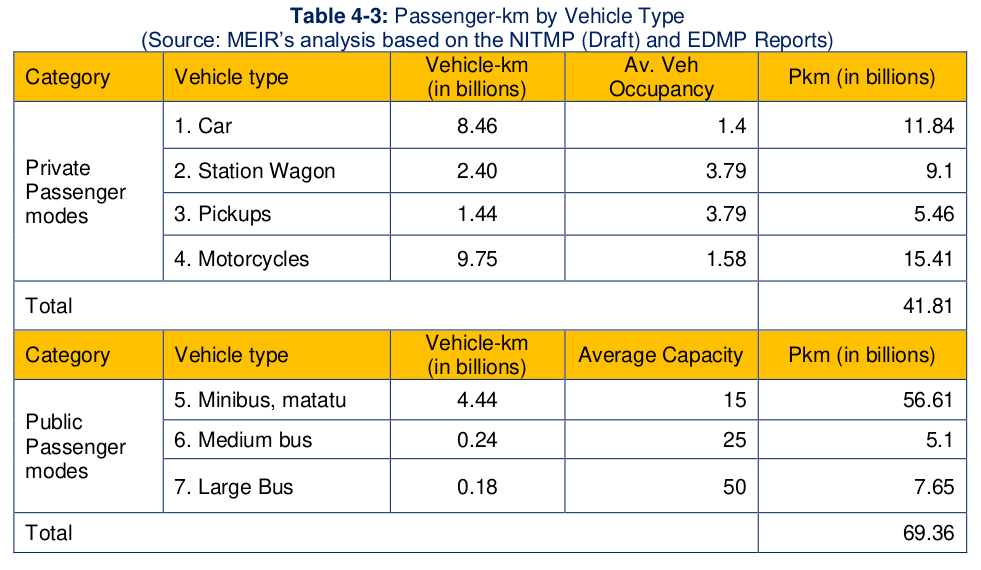

In [7]:
import numpy as np
import pandas as pd
import os
import utils.common_data_needs as cdn
from utils.utils import EDAUtils

# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

edau = EDAUtils()


/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/core/model_attributes.py:6684: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2551: UserWarning: Warning passed from optional_log: Successfully archived self.model_attributes to pickle at '/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2025-07-16T23;16;10.835895/sisepuede_run_2025-07-16T23;16;10.835895_model_attributes.pkl'.
  warnings.warn(f"Warning passed from optio

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1318.4 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2551: UserWarning: Warning passed from optional_log: Successfully initialized JuMP optimizer from solver module HiGHS..
  warnings.warn(f"Warning passed from optional_log: {msg}.")


In [20]:
dict_ssp = cdn._setup_sisepuede_elements()

matt = dict_ssp.get("model_attributes", )
models = dict_ssp.get("models", )
regions = dict_ssp.get("regions", )
time_periods = dict_ssp.get("time_periods", )


##  SOME CATEGORIES

_CAT_TRNS_HUMAN_POWERED = "human_powered"
_CAT_TRNS_POWERED_BIKES = "powered_bikes"
_CAT_TRNS_PUBLIC = "public"
_CAT_TRNS_ROAD_LIGHT = "road_light"

In [16]:
#[x for x in dir(models.model_enercons) if "modvar_trns" in x]

In [23]:
_CAT_UG_BLG = "large_bus"
_CAT_UG_BMD = "medium_bus"
_CAT_UG_CAR = "car"
_CAT_UG_MBM = "minubus_matatu"
_CAT_UG_MOT = "motorcyles"
_CAT_UG_PUP = "pickups"
_CAT_UG_STW = "station_wagon"


# Average occupancy rate data from table 4-3
avg_occ_rate = {_CAT_UG_CAR : 1.4,
                _CAT_UG_STW : 3.79,
                _CAT_UG_PUP : 3.79,
                _CAT_UG_MOT : 1.58,
                _CAT_UG_MBM : 15.0,
                _CAT_UG_BMD : 25.0,
                _CAT_UG_BLG : 50.0,
                }

weights_vkm = {_CAT_UG_CAR : 8.46,
               _CAT_UG_STW : 2.40,
               _CAT_UG_PUP : 1.44,
               _CAT_UG_MOT : 9.75,
               _CAT_UG_MBM : 4.44,
               _CAT_UG_BMD : 0.24,
               _CAT_UG_BLG : 0.18,
                }


Sisepuede schema:
* Variable : Average Passenger Vehicle Occupancy Rate
* occrate_trns_passenger_per_vehicle_$CAT-TRANSPORTATION$
* Cat : aviation``|``human_powered``|``powered_bikes``|``public``|``rail_passenger``|``road_heavy_regional``|``road_light``|``water_borne

In [24]:
# get the model variable 
modvar_occ = matt.get_variable(models.model_enercons.modvar_trns_average_passenger_occupancy)

field_light = modvar_occ.build_fields(category_restrictions = _CAT_TRNS_ROAD_LIGHT, )
field_powered_bikes = modvar_occ.build_fields(category_restrictions = _CAT_TRNS_POWERED_BIKES, )
field_public = modvar_occ.build_fields(category_restrictions = _CAT_TRNS_PUBLIC, )

## Crosswalk ssp categories-Analysis and Scenario Development in Uganda’s Transport Sector categories
ssp_cw = {
    field_public : [_CAT_UG_MBM, _CAT_UG_BLG, _CAT_UG_BMD],
    field_light : [_CAT_UG_CAR, _CAT_UG_PUP, _CAT_UG_STW],
    field_powered_bikes: [_CAT_UG_MOT],
}

In [30]:
ssp_cat_avg

{'occrate_trns_passenger_per_vehicle_public': np.float64(16.790123456790123),
 'occrate_trns_passenger_per_vehicle_road_light': np.float64(2.1461463414634148),
 'occrate_trns_passenger_per_vehicle_powered_bikes': np.float64(1.58)}

In [32]:
## Compute average value between categories

ssp_cat_avg = {}

for ssrp_cat, ssp_cat_cw in ssp_cw.items():
    vec_count = np.array([avg_occ_rate[cat] for cat in ssp_cat_cw])
    vec_weight = np.array([weights_vkm[cat] for cat in ssp_cat_cw])

    out = np.dot(vec_count, vec_weight)/vec_weight.sum()
    ssp_cat_avg.update({ssrp_cat: [out], })
#ssp_cat_avg = {ssp_cat : [np.mean([avg_occ_rate[cat] for cat in ssp_cat_cw])] 
#for ssrp_cat, ssp_cat_cw in ssp_cw.items()}

## We assume the data starts from the publication year of Analysis and Scenario Development in Uganda’s Transport Sector categories (2021)
## Since we have no additional information, let's assume the values are constant until the year 2100
df_years = pd.DataFrame({time_periods.field_year : range(2015, 2101)})

## Create pd.DataFrame
df_avg_occ_rate = pd.DataFrame(ssp_cat_avg)

## Merge dataframes
df_avg_occ_rate = df_years.merge(right=df_avg_occ_rate, how="cross")
df_avg_occ_rate

,year,occrate_trns_passenger_per_vehicle_public,occrate_trns_passenger_per_vehicle_road_light,occrate_trns_passenger_per_vehicle_powered_bikes
0,2015,16.790123,2.146146,1.58
1,2016,16.790123,2.146146,1.58
2,2017,16.790123,2.146146,1.58
3,2018,16.790123,2.146146,1.58
4,2019,16.790123,2.146146,1.58
...,...,...,...,...
81,2096,16.790123,2.146146,1.58
82,2097,16.790123,2.146146,1.58
83,2098,16.790123,2.146146,1.58
84,2099,16.790123,2.146146,1.58


## Validation
- Note that public transit in Uganda--and especially Kampala, which accounts for a significant proportion of all transit in Uganda--is heavily characterized by minibuses, which hold, at most, 15 people, meaning that a contrast with our expected higher number is not surprising

In [34]:
# Load global data
uga_global_df = cdn.get_raw_ssp_inputs()
uga_global_df[ssp_cw.keys()].head()

,occrate_trns_passenger_per_vehicle_public,occrate_trns_passenger_per_vehicle_road_light,occrate_trns_passenger_per_vehicle_powered_bikes
0,78.346714,1.6808,1
1,78.346714,1.6808,1
2,78.346714,1.6808,1
3,78.346714,1.6808,1
4,78.346714,1.6808,1


Comparing occrate_trns_passenger_per_vehicle_public...


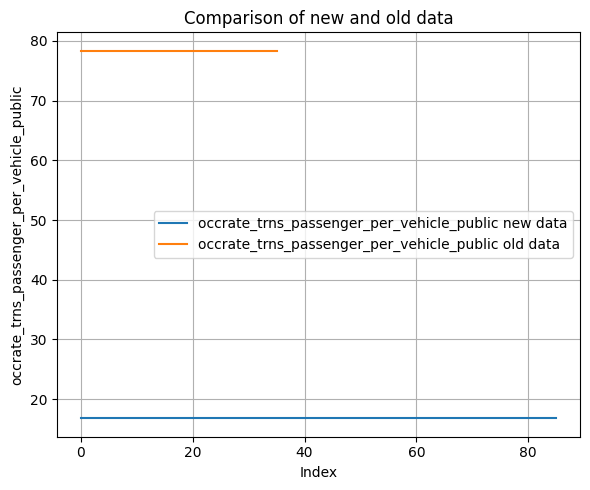

Comparing occrate_trns_passenger_per_vehicle_road_light...


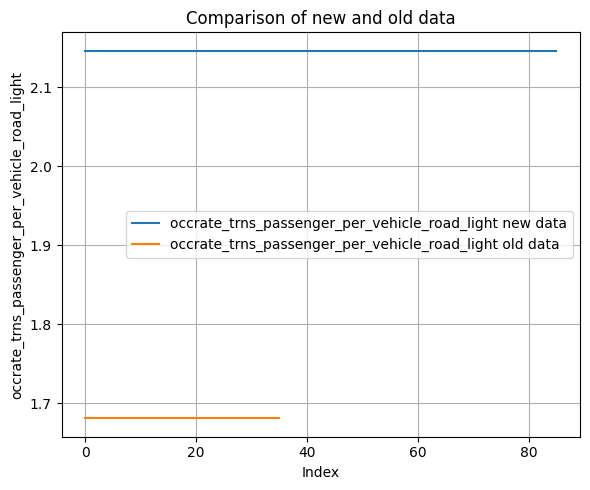

Comparing occrate_trns_passenger_per_vehicle_powered_bikes...


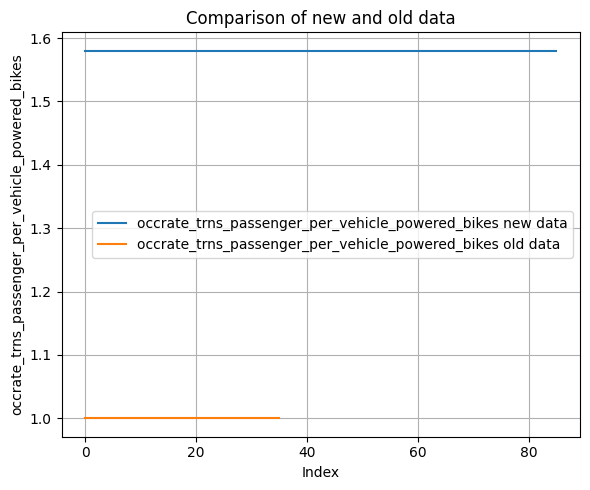

In [35]:
for col in df_avg_occ_rate.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(df_avg_occ_rate, uga_global_df, [col])

## Save

In [41]:
df_avg_occ_rate.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, f"{modvar_occ.name_fs_safe.upper()}.csv"), index=False)